In [1]:
### distribution line plot of C-read's fragments
### to show frequent contact pair and group across region
### region including bin,compartment,TAD,chromosome...
## import function
import pandas as pd
import numpy as np
import datatable as dt
import gc
from math import ceil
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # True font

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 

rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.family'] =  'Arial' # font Arial
rcParams['font.size'] =  12 
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelines
rcParams['axes.linewidth'] = 0.5

rcParams['axes.titlesize'] = 14
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [2]:
def LoadTables(filename, sepstr, usecols):
    dt_df = dt.fread(filename, sep=sepstr, header=True, columns=usecols, fill=True)
    df  = dt_df.to_pandas()
    del dt_df
    gc.collect()
    return(df)

# Loading
def Loading(filename):
    print("Loading %s"%filename)
    usecols = {"read_name","chrom","start","end"}
    VDF_DF = LoadTables(filename, ",",  usecols)
    VDF_DF.columns = ["read_id","chrom","start","end"]
    return(VDF_DF)

# Binsize
def Binsize(binsize, p_array):
    p_array = np.divide(p_array, binsize).astype("int")*binsize
    return(p_array)

In [3]:
## input Merge_Align_Fragment_RvdF.csv
#filename = "/data1/ZJY/Pore-C/Analysis/NA12878/Merge_NA12878/chr14/chr14.Merge_Align_Fragment_RvdF.csv"
filename = "/data1/ZJY/Pore-C/Analysis/NA12878/Merge_NA12878/vdFAnnotation/Merge_Align_Fragment_RvdF_5Reps.chr14.csv"
fragment = Loading(filename)

Loading /data1/ZJY/Pore-C/Analysis/NA12878/Merge_NA12878/vdFAnnotation/Merge_Align_Fragment_RvdF_5Reps.chr14.csv


In [4]:
## fragment pos and length bin
# BinFragments
bin_size = 10000
#fragment['start'] = Binsize(bin_size, fragment['start'].values)
#fragment['end'] =  Binsize(bin_size, fragment['end'].values)
fragment['middle'] = (fragment['start'] + fragment['end'])/2
fragment['middle'] = Binsize(bin_size, fragment['middle'].values)
print( fragment.head() )
# Fragment count 
FragCount = fragment.groupby("read_id")["start"].count()
FragCount.columns = ["read_id", "Fragnum"]
print( FragCount.head() )

                                read_id  chrom     start       end    middle
0  00f3a1b0-2c5f-44f1-8b2b-6c695dd1c8d0  chr14  67954723  67955322  67950000
1  00f3a1b0-2c5f-44f1-8b2b-6c695dd1c8d0  chr14  68025998  68026423  68020000
2  010591b2-8634-4ad0-9901-00be45d0bb54  chr14  92732723  92732923  92730000
3  010591b2-8634-4ad0-9901-00be45d0bb54  chr14  92752370  92752755  92750000
4  010591b2-8634-4ad0-9901-00be45d0bb54  chr14  92796762  92797387  92790000
read_id
000000c4-2fbb-432c-8cc1-814f39d2c712    5
000008a8-9713-463f-9ab8-b9f9a622b695    2
00000baa-b53c-4a45-9e42-ee6758150a2a    3
00000d59-3766-485d-b549-0e67d75e395b    1
00000f53-20d9-49e2-8b68-3666aac8ddd2    1
Name: start, dtype: int64


In [18]:
## Compartment Domain Laoding
compartment_file = "/data1/ZJY/Pore-C/Analysis/HiC_NA12878/Rao2014_Loops/Rao2014_GM12878_Compartment_hg38.bed"
## select chromosome
chrom = 'chr14'
columnid = ["chrom","start","end","compartment"]
compartment = pd.read_table(compartment_file, sep="\t",names=columnid, header=None)
compartment = compartment[compartment['chrom']==chrom].reset_index(drop=True)
compartment = compartment.sort_values(by="start")
bin_size = 10000
compartment["start"] = Binsize(bin_size, compartment['start'].values) # binsize
compartment["end"] = Binsize(bin_size, compartment['end'].values) # binsize


def set_compartment_index(compartment):
    '''
    Compartment index
    '''
    pindex, cindex = [],[]
    Acount, Bcount = 0,0
    for i in range(0,len(compartment)):
        com = compartment['compartment'][i]
        pindex.append(i)
        #print(com)
        if com == 'A':
            Acount += 1
            #cid = com + '_' + str(Acount)
            cid = com + '_' + str(i+1)
        else:
            Bcount += 1
            #cid = com + '_' + str(Bcount)
            cid = com + '_' + str(i+1)
        #print(cid)
        cindex.append(cid)
    compartment['cindex'] = cindex
    compartment['pindex'] = pindex
    return(compartment)

compartment = set_compartment_index(compartment)
com_pos_array = np.array(compartment['end'])
com_pos_index = compartment['cindex']
compartment.head()

,chrom,start,end,compartment,cindex,pindex
0,chr14,18220000,18320000,B,B_1,0
1,chr14,18620000,18910000,B,B_2,1
2,chr14,19730000,21230000,B,B_3,2
3,chr14,21230000,21530000,A,A_4,3
4,chr14,21530000,22330000,B,B_5,4


In [19]:
compartment.head(50)

,chrom,start,end,compartment,cindex,pindex
0,chr14,18220000,18320000,B,B_1,0
1,chr14,18620000,18910000,B,B_2,1
2,chr14,19730000,21230000,B,B_3,2
3,chr14,21230000,21530000,A,A_4,3
4,chr14,21530000,22330000,B,B_5,4
5,chr14,22330000,23130000,A,A_6,5
6,chr14,23130000,23230000,B,B_7,6
7,chr14,23230000,23330000,A,A_8,7
8,chr14,23330000,23430000,B,B_9,8
9,chr14,23430000,23630000,A,A_10,9


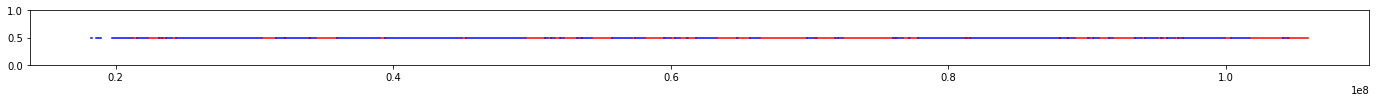

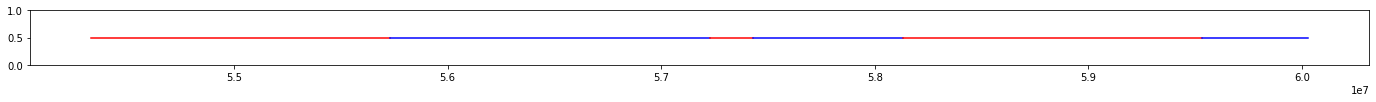

,chrom,start,end,compartment,cindex,pindex
35,chr14,54330000,55730000,A,A_36,35
36,chr14,55730000,57230000,B,B_37,36
37,chr14,57230000,57430000,A,A_38,37
38,chr14,57430000,58130000,B,B_39,38
39,chr14,58130000,59530000,A,A_40,39
40,chr14,59530000,60030000,B,B_41,40


In [20]:
## distribution line plot of C-read's fragments at chromosome level
## region legend
plt.figure(figsize=(24,1))
for i in range(0,len(compartment)):
    x1=compartment['start'][i]
    x2=compartment['end'][i]
    y=0.5
    color='b' if compartment['compartment'][i]=='B' else 'r'
    plt.plot([x1,x2],[y,y],color= color)
#plt.xlim(xmin,xmax)
plt.ylim(0,1)

#spindex, epindex = 35, 47
spindex, epindex = 35, 40
plt.figure(figsize=(24,1))
for i in range(spindex, epindex+1):
    x1=compartment['start'][i]
    x2=compartment['end'][i]
    y=0.5
    color='b' if compartment['compartment'][i]=='B' else 'r'
    plt.plot([x1,x2],[y,y],color= color)
#plt.xlim(xmin,xmax)
plt.ylim(0,1)
plt.show()
compartment.loc[spindex:epindex]

In [21]:
## Select Domians
sl_S, sl_E = 54330000, 60030000
sel_compartment = compartment.loc[(compartment.start>=sl_S) & (compartment.end<=sl_E), "cindex"].values
sComp_df = compartment.loc[(compartment.start>=sl_S) & (compartment.end<=sl_E), :]

# A compartment color Red;  B compartment color blue;
sComp_df["color"] = "r"
sComp_df.loc[sComp_df.compartment=="B", "color"] = "b"
print(sComp_df)

frag_colors = {}
for fid, fcolor in zip(sComp_df["cindex"].to_list() , sComp_df["color"].to_list()  ):
    frag_colors[fid] =  fcolor
frag_colors["notin"] = "grey"
frag_colors["otherA"] = "r"
frag_colors["otherB"] = "b"
print(frag_colors )

    chrom     start       end compartment cindex  pindex color
35  chr14  54330000  55730000           A   A_36      35     r
36  chr14  55730000  57230000           B   B_37      36     b
37  chr14  57230000  57430000           A   A_38      37     r
38  chr14  57430000  58130000           B   B_39      38     b
39  chr14  58130000  59530000           A   A_40      39     r
40  chr14  59530000  60030000           B   B_41      40     b
{'A_36': 'r', 'B_37': 'b', 'A_38': 'r', 'B_39': 'b', 'A_40': 'r', 'B_41': 'b', 'notin': 'grey', 'otherA': 'r', 'otherB': 'b'}


In [22]:
## Find fragments loacated in which TAD
## fragments middle pos are distributed into region
fragment['cindex'] = 'notin' # default not in TADs
fpos_array = np.array(fragment['middle'])
for i in range(0,len(compartment)):
    tid = compartment['cindex'][i]
    pos_array = np.array([compartment['start'][i],compartment['end'][i]])
    mid_pos_index = np.searchsorted(pos_array, fpos_array, side="left")
    fragment['cindex'].iloc[mid_pos_index==1] = tid
fragment.head()

,read_id,chrom,start,end,middle,cindex
0,00f3a1b0-2c5f-44f1-8b2b-6c695dd1c8d0,chr14,67954723,67955322,67950000,A_52
1,00f3a1b0-2c5f-44f1-8b2b-6c695dd1c8d0,chr14,68025998,68026423,68020000,A_52
2,010591b2-8634-4ad0-9901-00be45d0bb54,chr14,92732723,92732923,92730000,A_82
3,010591b2-8634-4ad0-9901-00be45d0bb54,chr14,92752370,92752755,92750000,A_82
4,010591b2-8634-4ad0-9901-00be45d0bb54,chr14,92796762,92797387,92790000,A_82


In [23]:
## Filter Reads fragment with select region compartments
P = fragment.cindex.isin( sel_compartment  )
selectReads = list( set( fragment.loc[P, "read_id"].to_list() ) )
fil_fragment = fragment.loc[ fragment.read_id.isin(selectReads),  : ]

### Set fragment outside select regions and notin as "other"
otherP = (~ fil_fragment.cindex.isin( sel_compartment ) ) & ( fil_fragment.cindex != "notin" ) & (fil_fragment.cindex.str.contains("A") )
fil_fragment.loc[otherP, "cindex"] = "otherA"
otherP = (~ fil_fragment.cindex.isin( sel_compartment ) ) & ( fil_fragment.cindex != "notin" ) & (fil_fragment.cindex.str.contains("B") )
fil_fragment.loc[otherP, "cindex"] = "otherB"

print( fil_fragment.head() )

                                  read_id  chrom     start       end  \
33   0f269703-7df4-4ca0-8bd2-ed9fbff2ea63  chr14  54398757  54399479   
34   0f269703-7df4-4ca0-8bd2-ed9fbff2ea63  chr14  54423167  54425998   
147  606fa581-76fc-4b42-9103-429f71810118  chr14  31800154  31800286   
148  606fa581-76fc-4b42-9103-429f71810118  chr14  55004690  55005100   
149  606fa581-76fc-4b42-9103-429f71810118  chr14  54859175  54860779   

       middle  cindex  
33   54390000    A_36  
34   54420000    A_36  
147  31800000  otherB  
148  55000000    A_36  
149  54850000    A_36  


In [24]:
## read contact type
frag_comp_count = fil_fragment.groupby(['read_id','cindex'])['chrom'].count().reset_index()
frag_comp_count = frag_comp_count.rename(columns={'chrom':'tcount'})

read_info = frag_comp_count.groupby('read_id')['cindex'].apply(list).reset_index()
read_info['tcount'] = frag_comp_count.groupby('read_id')['tcount'].apply(list).reset_index()['tcount']
read_info.head()

,read_id,cindex,tcount
0,00004464-35a2-4b34-9ab7-cf26c9247899,[A_36],[1]
1,000078ea-aedb-4de2-b6e4-e6ffdc48eb6e,[A_36],[3]
2,00007b64-b88e-427f-abf1-69f58750bdcd,"[A_36, otherB]","[1, 5]"
3,0000917a-babb-46fb-9c93-11c5decfee49,"[A_40, otherB]","[1, 7]"
4,0000e848-b4bf-4d40-a9bb-590aed54fcb1,[B_37],[1]


In [49]:
## Reads Span Region Info
## remove read with single fragment:
read_info = read_info.loc[read_info.tcount.apply(lambda x: x!=[1])] 
## remove read not in any compartment:
read_info = read_info.loc[read_info.cindex.apply(lambda x: x!=['notin'])]

# AdjA-B
def ABType(cindex):
    '''
    reads located in adjcent A-B compartment
    1. only two compartment
    2. abs(id1 - id2) = 1
    
    reads located in multiA, single B
    A+_B
    
    reads located in single A and multi B
    A_B+
    
    A & otherB,  B & other A  define as (A_B+) or (A+_B)
    '''
    if len(cindex) <= 2:
        if "otherA" in cindex:
            rt = "A+_B"
        elif "otherB" in cindex:
            rt = "A_B+"
        else:
            id1, id2 = int( cindex[0].split("_")[1] ), int( cindex[1].split("_")[1] )
            if abs(id1 - id2) == 1:
                rt = "Adjacent_A-B"
            else:
                rt = "Separated_A-B "
    else:
        Acount, Bcount = 0,0
        for c in cindex:
            if "A" in c:
                Acount += 1
            else:
                Bcount += 1
                
        if Acount == Bcount :
            rt = "A+_B+"
        elif Acount < Bcount:
            rt = "A_B+"
        else:
            rt = "A+_B"   
    return(rt)
        
## assign single-A, single-B read,  multi-A, multi-B reads, A-B
read_info['cindex_only'] = read_info.cindex.apply(lambda x: [t for t in x if t!='notin'])
read_type = []
for i in read_info.index:
    com = ','.join(read_info['cindex'][i])
    inA = 'A' in com
    inB = 'B' in com
    multi = len(read_info['cindex'][i]) > 1
    if inA and inB:
        rt =  ABType( read_info['cindex'][i] )
    elif multi and inA:
        rt = 'multiple_A'
    elif multi and inB:
        rt = 'multiple_B'
    elif inA:
        rt = 'single_A'
    else:
        rt = 'single_B'
    read_type.append(rt)
read_info.loc[:,'read_type'] = read_type
read_info.head()

,read_id,cindex,tcount,cindex_only,read_type
1,000078ea-aedb-4de2-b6e4-e6ffdc48eb6e,[A_36],[3],[A_36],single_A
2,00007b64-b88e-427f-abf1-69f58750bdcd,"[A_36, otherB]","[1, 5]","[A_36, otherB]",A_B+
3,0000917a-babb-46fb-9c93-11c5decfee49,"[A_40, otherB]","[1, 7]","[A_40, otherB]",A_B+
5,000103b6-23a0-477b-9df6-1bb1c8fb02ca,"[A_38, B_39, otherB]","[1, 1, 2]","[A_38, B_39, otherB]",A_B+
8,00012f24-9bef-4e23-a7b5-fba44a4e5399,[A_36],[3],[A_36],single_A


In [50]:
read_info.read_type.value_counts()

A_B+              54439
single_A          49200
A+_B              44037
multiple_B        40684
multiple_A        35080
single_B          31023
Adjacent_A-B      18788
A+_B+              6789
Separated_A-B      2483
Name: read_type, dtype: int64

In [51]:
## Span Compartments info to Fragment
read_info = read_info.set_index("read_id", drop=False)
New_fragment = fil_fragment.loc[fil_fragment.read_id.isin(read_info.index.to_list()),  :] ## filter
New_fragment.loc[:, "type"] = New_fragment["read_id"].apply(lambda x: read_info.loc[x]["read_type"] )
New_fragment

,read_id,chrom,start,end,middle,cindex,type
33,0f269703-7df4-4ca0-8bd2-ed9fbff2ea63,chr14,54398757,54399479,54390000,A_36,single_A
34,0f269703-7df4-4ca0-8bd2-ed9fbff2ea63,chr14,54423167,54425998,54420000,A_36,single_A
147,606fa581-76fc-4b42-9103-429f71810118,chr14,31800154,31800286,31800000,otherB,A_B+
148,606fa581-76fc-4b42-9103-429f71810118,chr14,55004690,55005100,55000000,A_36,A_B+
149,606fa581-76fc-4b42-9103-429f71810118,chr14,54859175,54860779,54850000,A_36,A_B+
...,...,...,...,...,...,...,...
13972484,f4c08b32-34f6-4379-bfaa-b623041437fc,chr14,57611266,57611957,57610000,B_39,A+_B
13972485,f4c08b32-34f6-4379-bfaa-b623041437fc,chr14,34818301,34820916,34810000,otherA,A+_B
13972486,f4c08b32-34f6-4379-bfaa-b623041437fc,chr14,35668725,35669554,35660000,otherA,A+_B
13972487,f4c08b32-34f6-4379-bfaa-b623041437fc,chr14,35860368,35860854,35860000,otherA,A+_B


In [52]:
def GetFragCount(groupfragment):
    groupfragment.loc[:, "Fragnum"] = groupfragment.loc[:,"read_id"].apply(lambda x:  FragCount.loc[x] )
    return(groupfragment)

### Group Fragment
GroupFragment = {}
for gtype, groupframent in New_fragment.groupby("type", as_index=False):
    read_ids = list( set( groupframent.read_id.to_list() ) )
    print("Get fragment info for : %s, %d reads"%(gtype,  len(read_ids) ) )
    groupframent = GetFragCount(groupframent)    
    GroupFragment[ gtype ] = groupframent
    groupframent = None
    del groupframent


Get fragment info for : A+_B, 44037 reads
Get fragment info for : A+_B+, 6789 reads
Get fragment info for : A_B+, 54439 reads
Get fragment info for : Adjacent_A-B, 18788 reads
Get fragment info for : Separated_A-B , 2483 reads
Get fragment info for : multiple_A, 35080 reads
Get fragment info for : multiple_B, 40684 reads
Get fragment info for : single_A, 49200 reads
Get fragment info for : single_B, 31023 reads


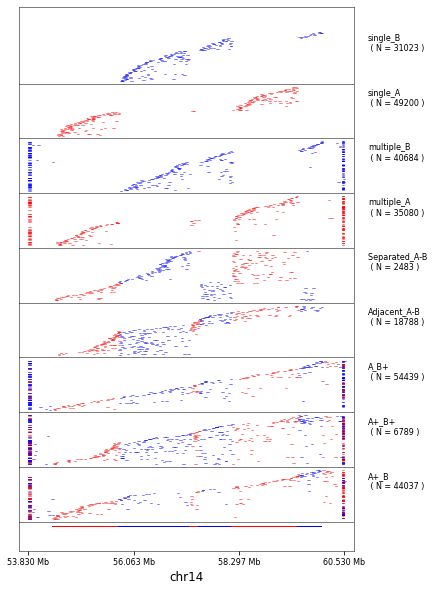

In [54]:
# Plot
import random
random.seed (10)

def Mergebins(gf, binsize=100000):
    '''
    Rebin fragment to large binsize and merge the same middle bin 
    '''
    gf.loc[:, "middle"] = Binsize(binsize, gf['middle'].values)
    gf = gf.drop_duplicates(subset=["read_id", "middle"], keep='first', ignore_index=True)
    return(gf)

# reorder reads according to the select  Compartments
def SortIndex(gf):
    '''
    Sort reads order by the select TADs position
    '''
    ## reads order
    P = (gf.cindex != "notin") & (gf.cindex != "otherA") & (gf.cindex != "otherB")
    read_pos_df = gf.loc[P, ["read_id", "middle"]].groupby("read_id").min()
    read_pos_df = read_pos_df.reset_index() # read_id
    read_pos_df  = read_pos_df.sort_values("middle", ignore_index=True)
    read_pos_df = read_pos_df.reset_index() # order index
    read_pos_df.columns = ["reindex", "read_id", "pos"]
    
    read_pos_df = read_pos_df.set_index("read_id")
    gf = gf.loc[gf.read_id.isin(read_pos_df.index), :]
    gf.loc[:, "reindex"] = gf["read_id"].apply(lambda x:  read_pos_df.loc[x, "reindex"] )
    gf = gf.sort_values("reindex", ignore_index=True)
    return(gf)

def SubSampling(gf, readnums=0):
    '''
    SubSample reads to show.
    0 means all
    '''
    read_ids = list( set( gf.read_id.to_list() ) )
    if len(read_ids) > readnums and readnums != 0:
        sample_ids = random.sample(read_ids, readnums) 
        gf = gf.loc[gf.read_id.isin(sample_ids ), :]
    return(gf)
        
def OutsideRegionFragment(gf, regionS, regionE, binsize=100000):
    '''
    read fragment outside specific regions
    '''
    Region_lP = gf.end <= regionS # fragment outside left
    if sum(Region_lP) >= 1:
        gf.loc[Region_lP, "start"] = regionS
        gf.loc[Region_lP, "end"] = regionS + binsize*0.5
    
    Region_rP = gf.start >= regionE # fragment outside right
    if sum(Region_rP) >= 1:
        gf.loc[Region_rP, "end"] = regionE
        gf.loc[Region_rP, "start"] = regionE -  binsize*0.5
    return(gf)
        
def ShortFragmentV(gf, binsize=100000):
    '''
    let short fragment longth enough to be visible
    '''
    P = gf.end - gf.start <= binsize
    gf.loc[P, "end"] = gf.loc[P, "start"].values +   binsize*0.5
    gf.loc[P, "start"] = gf.loc[P, "end"].values -   binsize*0.5
    return(gf)

# Figure show
plt.figure(figsize=(6,10))

binsize = 100000
FigFlank = 5*binsize
xmin, xmax = min(sComp_df['start'])-FigFlank, max(sComp_df['end'])+FigFlank
FigY = 10
readnums = 100

## Ref Domain region 
for n, rowvalue in sComp_df.iterrows() :
    x1=rowvalue['start']
    x2=rowvalue['end']
    y = 1
    color=rowvalue['color']
    plt.plot([x1,x2],[y,y],color= color, linewidth=1)
    
for gType, groupfragment in GroupFragment.items():
    
    row_read_ids = list( set( groupfragment.read_id.to_list() ) )
    groupfragment = SubSampling(  groupfragment,  readnums)
    groupfragment = Mergebins(groupfragment, binsize)
    groupfragment = OutsideRegionFragment(groupfragment, xmin, xmax)
    groupfragment = SortIndex(groupfragment) 
    groupfragment = ShortFragmentV(groupfragment, binsize)

    ## plot read from different Compartment group
    for i in range(0,len(groupfragment) ):
        x1=groupfragment['start'][i]
        x2=groupfragment['end'][i] 
        y = groupfragment['reindex'][i] + FigY+5
        color= frag_colors[groupfragment['cindex'][i] ]
        plt.plot([x1,x2],[y,y],color= color, linewidth=0.5)

    ## plot group seperate line
    plt.plot( [xmin-FigFlank, xmax+FigFlank], [FigY, FigY], color="k",linewidth=0.5 )

    ## plot read ligation
    #greads = 0
    #for read_id, read_df in groupfragment.groupby("read_id"):
    #    x1 = read_df["start"].min()
    #    x2 = read_df["end"].max()
    #    y = read_df['reindex'].min() + FigY+5
    #    plt.plot([x1,x2],[y,y],color="grey", linewidth=0.1)
    #    greads += 1
    
    ## plot Annotation
    Annotext = "%s\n ( N = %d )"%(gType, len(row_read_ids ) )
    plt.text(xmax+FigFlank, FigY+greads, Annotext, ha="left", va="top", fontsize=8 )
    
    groupfragment = None
    del groupfragment
    
    FigY += greads + 10

plt.xlim(xmin-2*binsize,xmax+2*binsize)
# xticks
xticks = list( np.linspace(xmin,xmax, 4, dtype=int) )
xticks_label = ["%.3f Mb"%(i/10**6) for i in xticks]
plt.yticks([])
plt.xticks(xticks, 
           xticks_label, 
           fontsize=8, 
           color='k' )
plt.xlabel("chr14")
plt.savefig("Inter_Compartment_chr14.pdf")

In [37]:
groupfragment

,read_id,chrom,start,end,middle,cindex,type,Fragnum
0,c0f6106c-3a36-498b-8294-245903bd2c71,chr14,58144363,58144499,58100000,A_19,A-B,7
1,c0f6106c-3a36-498b-8294-245903bd2c71,chr14,58840983,58841885,58800000,A_19,A-B,7
2,c0f6106c-3a36-498b-8294-245903bd2c71,chr14,58797027,58797785,58700000,A_19,A-B,7
3,c0f6106c-3a36-498b-8294-245903bd2c71,chr14,60480000,60530000,80200000,otherB,A-B,7
4,c0f6106c-3a36-498b-8294-245903bd2c71,chr14,59017848,59020086,59000000,A_19,A-B,7
...,...,...,...,...,...,...,...,...
433,e6d72a9a-b2e3-42d1-a763-f2881a194b4e,chr14,55191039,55191636,55100000,A_17,A-B,15
434,e6d72a9a-b2e3-42d1-a763-f2881a194b4e,chr14,55046239,55046545,55000000,A_17,A-B,15
435,e6d72a9a-b2e3-42d1-a763-f2881a194b4e,chr14,55450658,55450981,55400000,A_17,A-B,15
436,e6d72a9a-b2e3-42d1-a763-f2881a194b4e,chr14,53830000,53880000,33500000,otherB,A-B,15


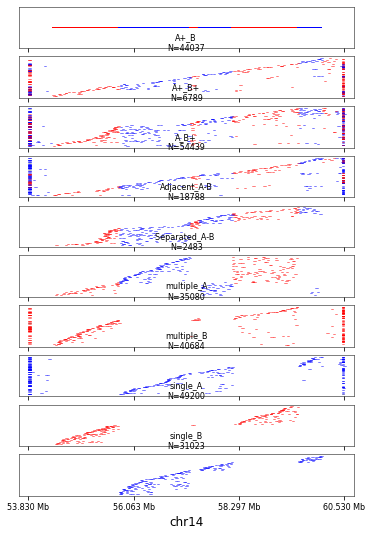

In [59]:
# Figure show
Groups = len(GroupFragment.keys() )
fig, axs = plt.subplots( Groups+1 ,1, figsize=(6,Groups*1), sharex=True)

binsize = 100000
FigFlank = 5*binsize
xmin, xmax = min(sComp_df['start'])-FigFlank, max(sComp_df['end'])+FigFlank
FigY = 10
readnums = 100

## Ref Domain region 
for n, rowvalue in sComp_df.iterrows() :
    x1=rowvalue['start']
    x2=rowvalue['end']
    y = 1
    color=rowvalue['color']
    axs[0].plot([x1,x2],[y,y],color= color, linewidth=1)
    axs[0].set_ylim(0,2)
    axs[0].set_yticks([])
    
figN = 1

for gType, groupfragment in GroupFragment.items():
    
    row_read_ids = list( set( groupfragment.read_id.to_list() ) )
    groupfragment = SubSampling(  groupfragment,  readnums)
    groupfragment = Mergebins(groupfragment, binsize)
    groupfragment = OutsideRegionFragment(groupfragment, xmin, xmax)
    groupfragment = SortIndex(groupfragment) 
    groupfragment = ShortFragmentV(groupfragment, binsize)

    ## plot read from different Compartment group
    for i in range(0,len(groupfragment) ):
        x1=groupfragment['start'][i]
        x2=groupfragment['end'][i] 
        y = groupfragment['reindex'][i] 
        color= frag_colors[groupfragment['cindex'][i] ]
        axs[figN].plot([x1,x2],[y,y],color= color, linewidth=0.5)

    axs[figN].set_title("%s\nN=%d"%(gType, len(row_read_ids )  ) , fontsize=8)
    axs[figN].set_yticks([])
    figN += 1
    ## plot Annotation
    groupfragment = None

plt.xlim(xmin-2*binsize,xmax+2*binsize)
# xticks
xticks = list( np.linspace(xmin,xmax, 4, dtype=int) )
xticks_label = ["%.3f Mb"%(i/10**6) for i in xticks]
plt.yticks([])
plt.xticks(xticks, 
           xticks_label, 
           fontsize=8, 
           color='k' )
plt.xlabel("chr14")
plt.savefig("Inter_Compartment_chr14_v2.pdf")